In [1]:
# mrgsolveパッケージをインストール
install.packages("mrgsolve")
library(mrgsolve)
library(tidyverse)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#1-コンパートメントモデル経口投与
code<-" 
$PARAM
Ke = 0.05, Vd = 50, Ka = 0.08333
$INIT
Xa=10000, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "

Building oral ... 
done.



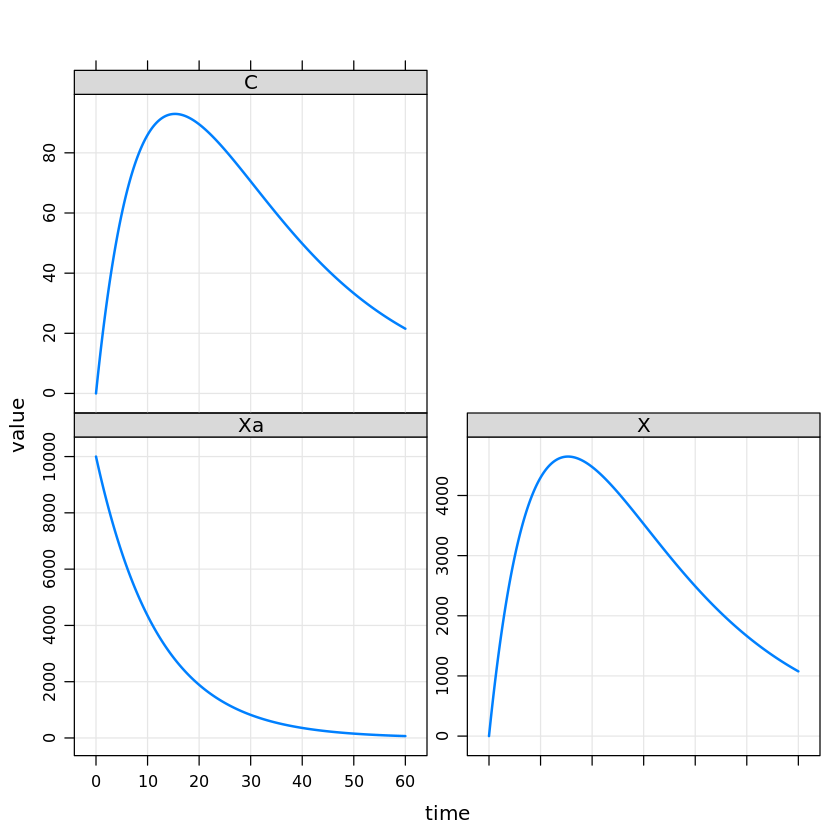

In [3]:
#グラフを描く
mod<-mcode("oral", code) %>% update(end = 60, delta = 0.1)
mod %>% mrgsim %>% plot

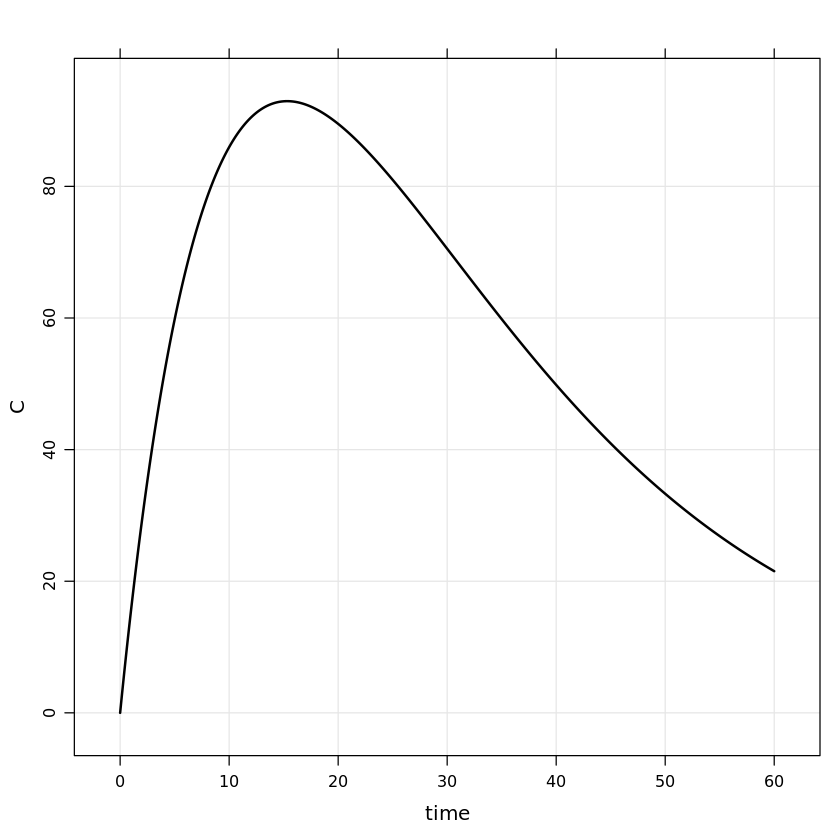

In [4]:
#血中濃度のグラフを描く
out <- 
  mod %>% 
  mrgsim(end=60)
plot(out, C~time, col="black")

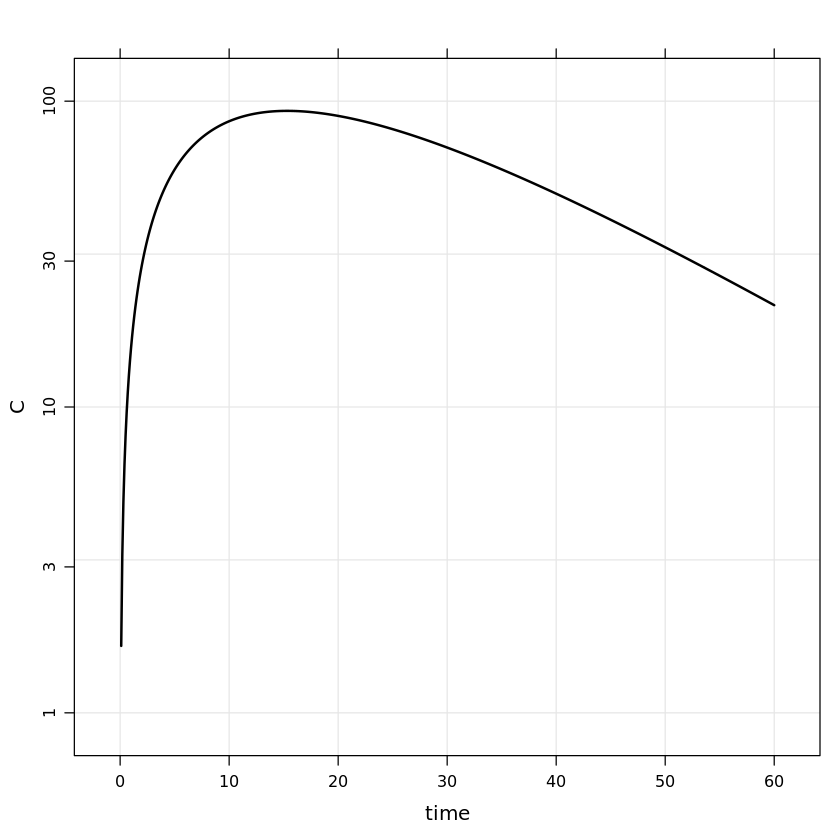

In [6]:
#縦軸が片対数の血中濃度のグラフを描く
plot(out, C~time, logy="true", ylim=c(1,100), col="black")

In [7]:
#0.5分までのデータを見る
head(out)

,ID,time,Xa,X,C
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.0,10000.000,0.00000,0.000000
2,1,0.1,9917.016,82.77637,1.655527
3,1,0.2,9834.721,164.45297,3.289059
4,1,0.3,9753.109,245.04101,4.900820
5,1,0.4,9672.174,324.55155,6.491031
6,1,0.5,9591.911,402.99559,8.059912


In [8]:
#2から60分のデータを見る
filter(out, time %in% c(2,5,10,12,15,20,30,40,50,60))

ID,time,Xa,X,C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,8464.87368,1458.839,29.17678
1,5,6592.51618,2988.908,59.77817
1,10,4346.12695,4298.207,85.96414
1,12,3678.94157,4523.208,90.46417
1,15,2865.19123,4646.465,92.92929
1,20,1888.88195,4475.050,89.50099
1,30,820.93207,3526.135,70.52271
1,40,356.78750,2491.563,49.83126
1,50,155.06438,1664.564,33.29128


Building oral2 ... 
done.



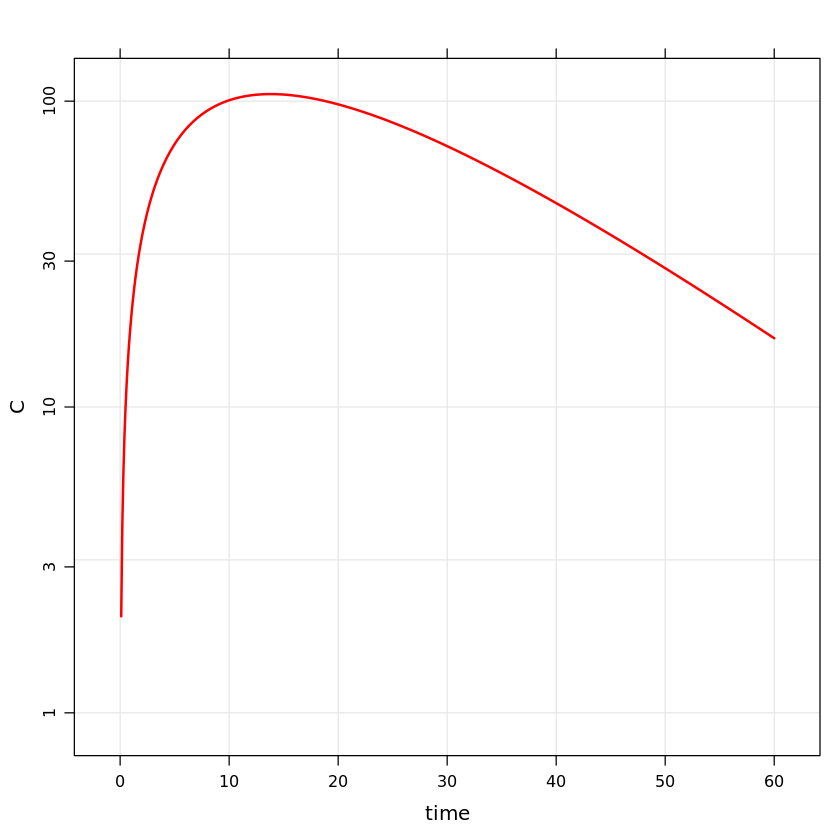

In [9]:
#Vdが違っていた場合の血中濃度変化
code2<-" 
$PARAM
Ke = 0.0625, Vd = 40, Ka = 0.08333
$INIT
Xa=10000, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "
mod2<-mcode("oral2", code2) %>% update(end = 60, delta = 0.1)
out2 <- mod2 %>% mrgsim(end=60)
plot(out2, C~time, logy="true", ylim=c(1,100), col="red")

In [10]:
#2から60分のデータを見る
filter(out2, time %in% c(2,5,10,12,15,20,30,40,50,60))

ID,time,Xa,X,C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,8464.87368,1440.5542,36.01386
1,5,6592.51618,2894.9079,72.37270
1,10,4346.12695,4026.4325,100.66081
1,12,3678.94157,4179.3974,104.48493
1,15,2865.19123,4203.9647,105.09912
1,20,1888.88195,3905.1327,97.62832
1,30,820.93207,2850.8125,71.27031
1,40,356.78750,1856.4727,46.41182
1,50,155.06438,1137.3563,28.43391


Building oral3 ... 
done.



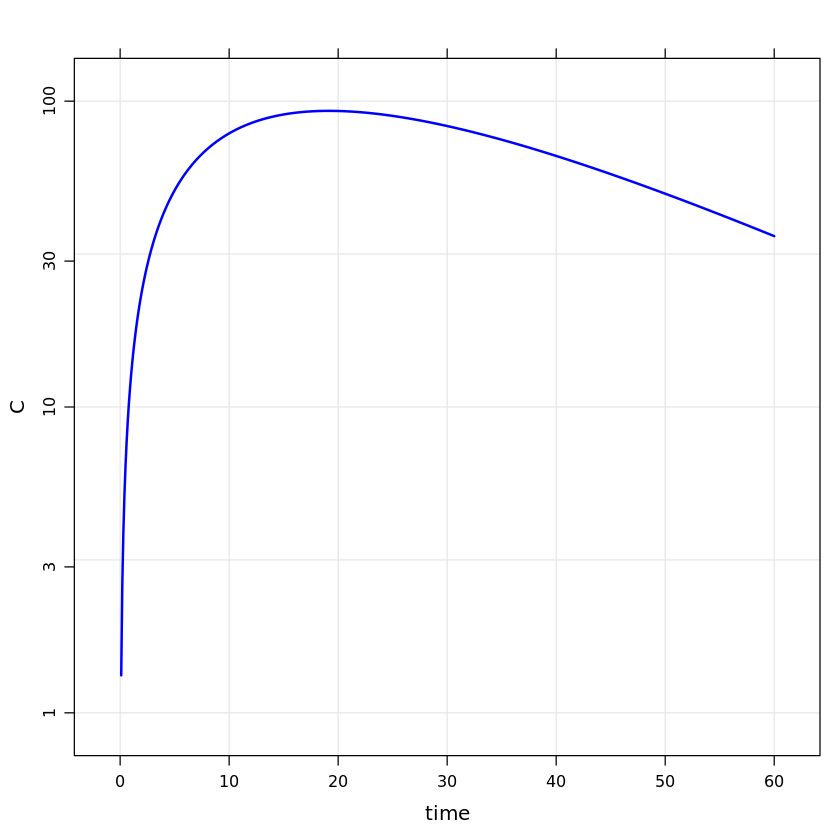

In [11]:
#流速が2.0mL/minだった場合の血中濃度変化
code3<-" 
$PARAM
Ke = 0.04, Vd = 50, Ka = 0.06667
$INIT
Xa=10000, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "
mod3<-mcode("oral3", code3) %>% update(end = 60, delta = 0.1)
out3 <- mod3 %>% mrgsim(end=60)
plot(out3, C~time, logy="true", ylim=c(1,100), col="blue")

In [12]:
#2から60分のデータを見る
filter(out3, time %in% c(2,5,10,12,15,20,30,40,50,60))

ID,time,Xa,X,C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,8751.6748,1198.632,23.97263
1,5,7165.1937,2555.093,51.10186
1,10,5134.0001,3922.707,78.45414
1,12,4493.1099,4236.492,84.72985
1,15,3678.6105,4523.425,90.46851
1,20,2635.7957,4643.387,92.86773
1,30,1353.2175,4146.501,82.93001
1,40,694.7419,3310.310,66.20620
1,50,356.6805,2491.494,49.82988


Building oral4 ... 
done.



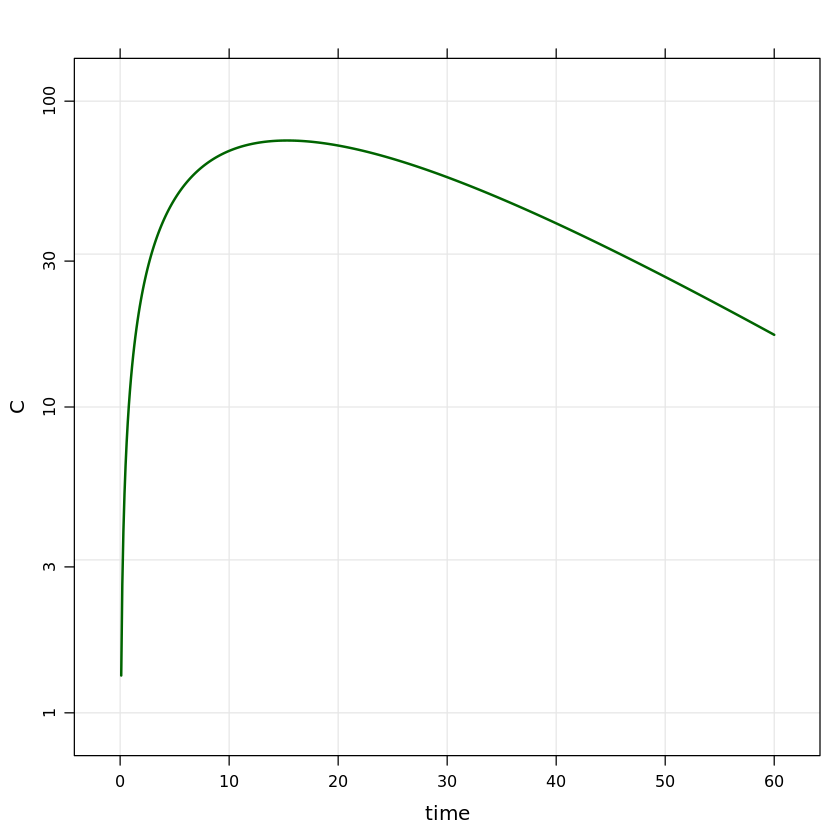

In [13]:
#投与量が違っていた場合の血中濃度変化
code4<-" 
$PARAM
Ke = 0.05, Vd = 50, Ka = 0.08333
$INIT
Xa=8000, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "
mod4<-mcode("oral4", code4) %>% update(end = 60, delta = 0.1)
out4 <- mod4 %>% mrgsim(end=60)
plot(out4, C~time, logy="true", ylim=c(1,100), col="dark green")

In [14]:
#2から60分のデータを見る
filter(out4, time %in% c(2,5,10,12,15,20,30,40,50,60))

ID,time,Xa,X,C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,6771.89895,1167.0710,23.34142
1,5,5274.01294,2391.1268,47.82254
1,10,3476.90156,3438.5656,68.77131
1,12,2943.15325,3618.5667,72.37133
1,15,2292.15298,3717.1716,74.34343
1,20,1511.10556,3580.0397,71.60079
1,30,656.74566,2820.9083,56.41817
1,40,285.43000,1993.2503,39.86501
1,50,124.05150,1331.6511,26.63302


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


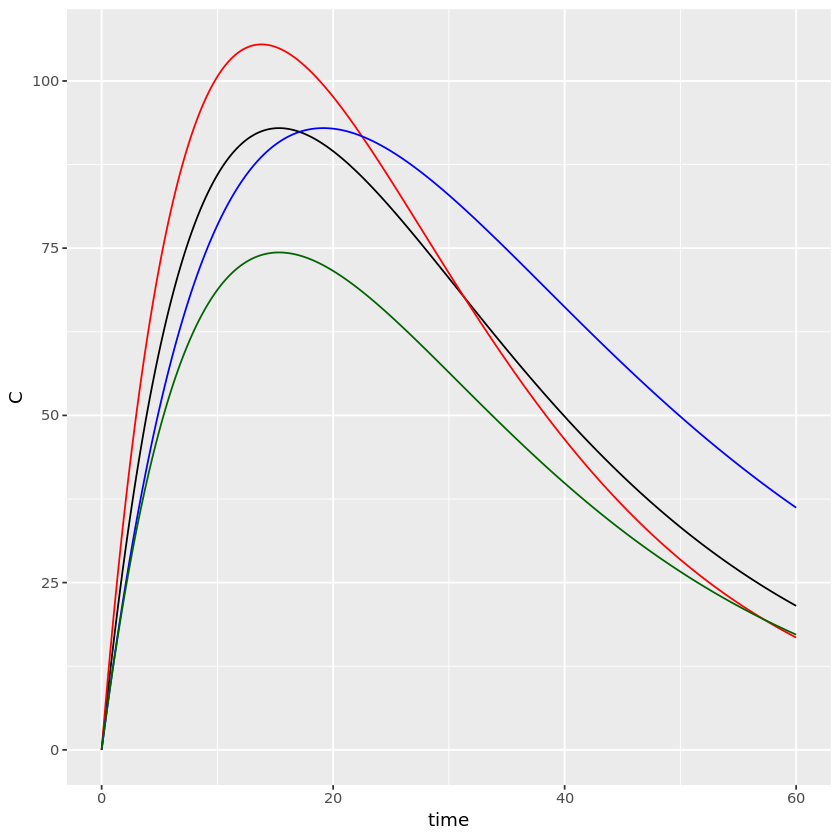

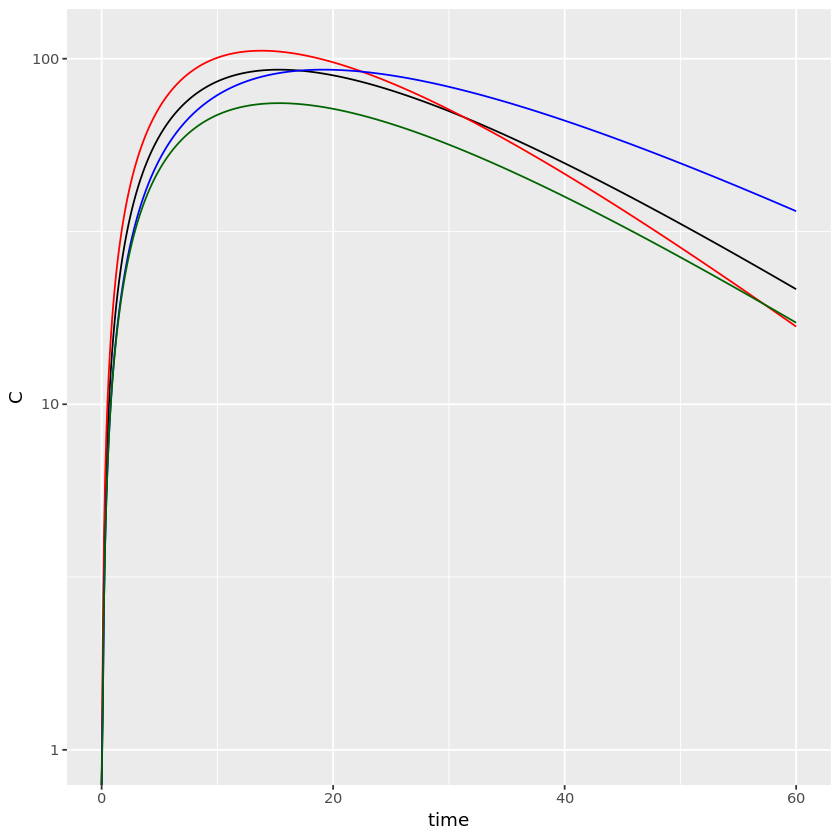

In [15]:
#グラフを重ねて表示
d<-select(out, time, C)
d2<-select(out2, time, C)
d3<-select(out3, time, C)
d4<-select(out4, time, C)
g <- ggplot() +
  geom_line(data = d, aes(time, C)) +
  geom_line(data = d2, aes(time, C), col="red") +
  geom_line(data = d3, aes(time, C), col="blue") +
  geom_line(data = d4, aes(time, C), col="dark green")
print(g)
g2 <- g + scale_y_log10(limits=c(1,110))
print(g2)

In [16]:
#データをまとめて表示
tp<- c(2,5,10,12,15,20,30,40,50,60)
df <- filter(d, time %in% tp)
df2 <- filter(d2, time %in% tp)
df3 <- filter(d3, time %in% tp)
df4 <- filter(d4, time %in% tp)
dfa = cbind(df,df2,df3,df4)
dfa

time,C,time,C,time,C,time,C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,29.17678,2,36.01386,2,23.97263,2,23.34142
5,59.77817,5,72.37270,5,51.10186,5,47.82254
10,85.96414,10,100.66081,10,78.45414,10,68.77131
12,90.46417,12,104.48493,12,84.72985,12,72.37133
15,92.92929,15,105.09912,15,90.46851,15,74.34343
20,89.50099,20,97.62832,20,92.86773,20,71.60079
30,70.52271,30,71.27031,30,82.93001,30,56.41817
40,49.83126,40,46.41182,40,66.20620,40,39.86501
50,33.29128,50,28.43391,50,49.82988,50,26.63302
